# 🌸 Iris Species Analysis Using Seaborn

**Name:** Sanjida Khatheeb  
**Course:** Data Analytics Project  
**Tool Used:** Python (Jupyter Notebook)  
**Libraries:** pandas, matplotlib, seaborn

## 🧭 Introduction

The Iris dataset is one of the most famous datasets in machine learning and statistics.  
It contains 150 samples of iris flowers, each with measurements for sepal length, sepal width, petal length, and petal width across three species — *Iris setosa*, *Iris versicolor*, and *Iris virginica*.

The goal of this analysis is to understand the relationships between these features, visualize differences among species, and identify which measurements best distinguish one species from another.

## 🔍 Dataset Preprocessing

The dataset is directly available in Seaborn as `sns.load_dataset("iris")`.  
It includes:
- **sepal_length** (in cm)  
- **sepal_width** (in cm)  
- **petal_length** (in cm)  
- **petal_width** (in cm)  
- **species** (categorical variable with three classes)

We’ll explore its structure, check for missing values, and understand its statistical summary before visualizing it.

In [5]:
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()
data = pd.DataFrame(iris.data, columns=iris.feature_names)
data['species'] = iris.target
data['species'] = data['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})
data.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## 🧹 Data Cleaning
 **No data cleaning is required** - the Iris dataset is well-structured, with no missing or duplicate values.
 
**Observations:**
- The dataset contains **150 rows** and **5 columns**.  
- There are **no missing values** — all measurements are complete.  
- Data types are appropriate: numerical columns for measurements and a categorical column (`species`).  
- Mean and range values show that **petal measurements vary more** than sepal measurements, which might help in distinguishing species.


In [9]:
# Shape of the dataset
print("Shape:", iris.shape)

# Data types and missing values
print(iris.info())

# Summary statistics
print(iris.describe())


Shape: (150, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None
       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.90

## 💡 Research Question

**Which features best separate the three Iris species based on their measurements?**

Through this project, we aim to discover:
- How sepal and petal measurements vary across species  
- Which features show the strongest correlation  
- Visual patterns that might help in classifying the species


## 📊 Exploratory Data Analysis (EDA)
**(a) Pairplot - relationships between all features**

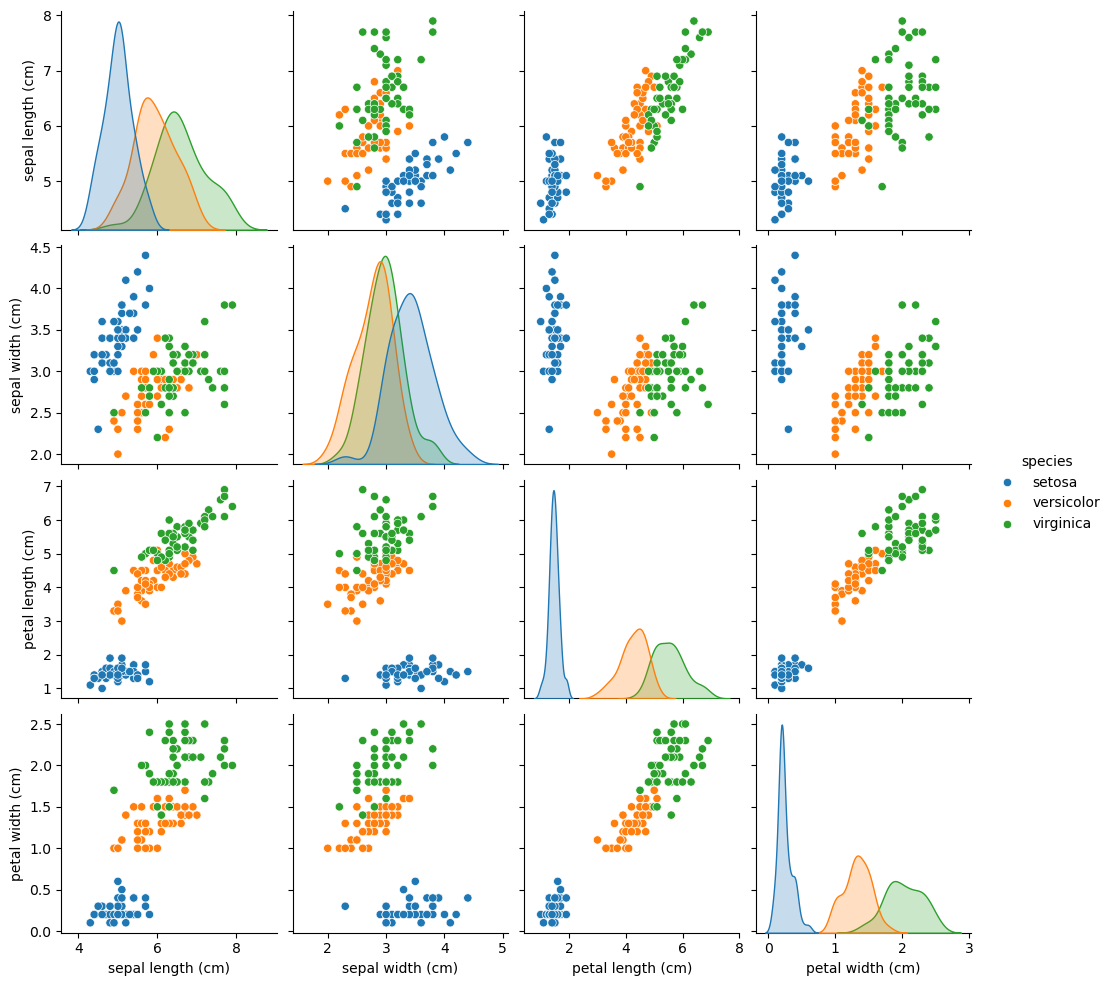

In [7]:
sns.pairplot(data, hue='species')
plt.show()

✅ **Observation:**
Petal length and petal width clearly separate Setosa from the other two species. Versicolor and Virginica overlap slightly.

**(b) Boxplot — Sepal Length Distribution**

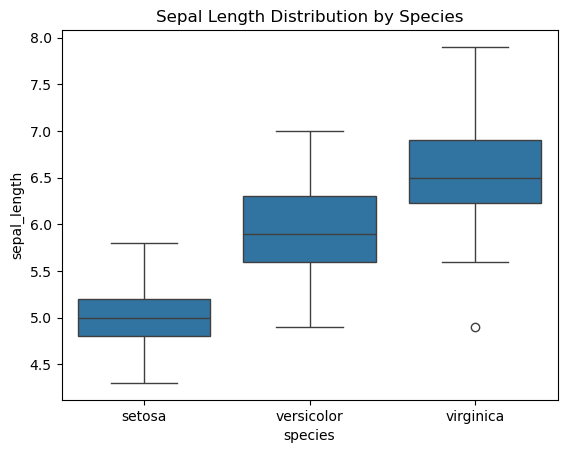

In [10]:
sns.boxplot(x='species', y='sepal_length', data=iris)
plt.title('Sepal Length Distribution by Species')
plt.show()

✅ **Observation:**
Virginica generally has longer sepals, while Setosa has shorter ones.

**(c) Violin Plot — Petal Length Distribution**

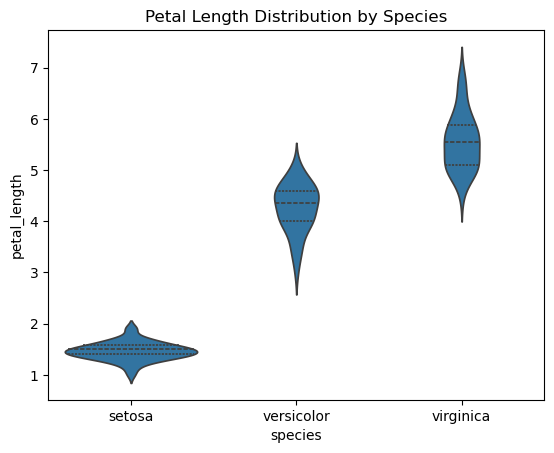

In [12]:
sns.violinplot(x='species', y='petal_length', data=iris, inner='quartile')
plt.title('Petal Length Distribution by Species')
plt.show()

✅ **Observation:**
Distinct separation in petal_length across species; petal_length is a strong differentiator.

**(d) Correlation Heatmap**

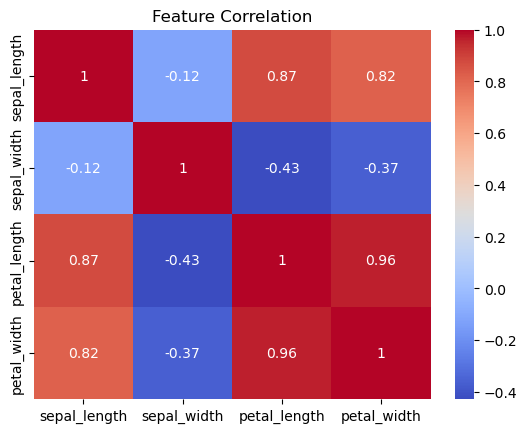

In [13]:
corr = iris.drop(columns='species').corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Feature Correlation')
plt.show()

✅ **Observation:**
Strong positive correlation between petal_length and petal_width (r ≈ 0.96).
Weak or no correlation between sepal_width and other features.

## 🛠️ Interactive dashboard
- Hover over points to see exact values.
- Zoom and pan interactively.
- Easily spot clusters or overlapping species.

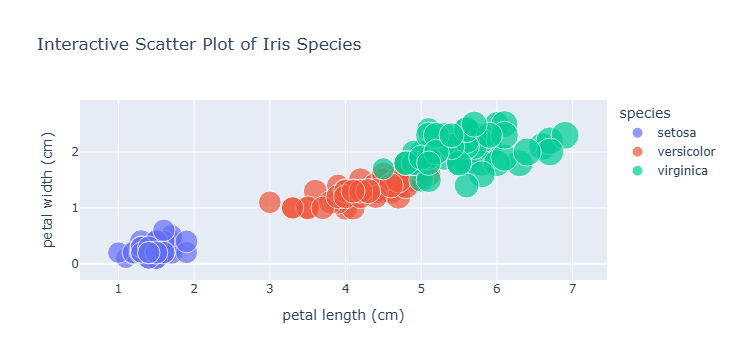

In [31]:
fig = px.scatter(
    data, 
    x='petal length (cm)', 
    y='petal width (cm)',
    color='species',
    size='sepal length (cm)',  
    hover_data=['sepal width (cm)'],  
    title="Interactive Scatter Plot of Iris Species"
)
fig.show()

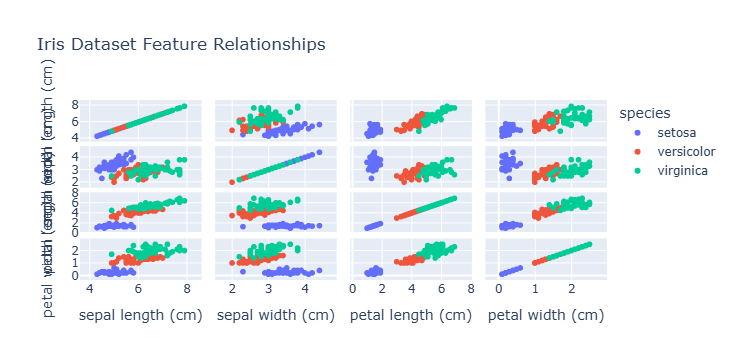

In [27]:
fig = px.scatter_matrix(
    data,
    dimensions=['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'],
    color='species',
    title='Iris Dataset Feature Relationships'
)
fig.show()


## 📋 Insights & Conclusion
- Profit increases when COGS is managed efficiently.
- High freight costs reduce profit margins.
- Sales peak in certain fiscal months (seasonality).
- Petal length and petal width are the key distinguishing features between species.
- Setosa is most easily separable, while Versicolor and Virginica have overlapping traits.
- The dataset is clean and balanced, suitable for machine learning classification.

In [18]:
import pandas as pd
mean_values = data.groupby('species').mean()
winner = mean_values.idxmax()
summary_table = pd.DataFrame({
    'Feature': mean_values.columns,
    'Winner Species': winner.values,
    'Max Mean Value': mean_values.max().values
})
summary_table

,Feature,Winner Species,Max Mean Value
0,sepal length (cm),virginica,6.588
1,sepal width (cm),setosa,3.428
2,petal length (cm),virginica,5.552
3,petal width (cm),virginica,2.026
